Task 1: 

In [ ]:
import time
import hashlib
import random
import string

def sha256_hash(data):
    hash_object = hashlib.sha256(data.encode())
    return hash_object.hexdigest()

def random_string(length=10):
    chars = string.ascii_letters + string.digits  # a-z, A-Z, 0-9
    return ''.join(random.choice(chars) for _ in range(length))

def find_collision():
    seen_hashes = {}

    start_time = time.time()
    count = 0
    
    while True:

        count += 1
        rand_str = random_string()
        truncated_hash = sha256_hash(rand_str)[:8]

        if truncated_hash in seen_hashes:
            end_time = time.time()
            print(f"Collision found!")
            print(f"String 1: {seen_hashes[truncated_hash]} -> {truncated_hash}")
            print(f"String 2: {rand_str} -> {truncated_hash}")
            return

        seen_hashes[truncated_hash] = rand_str
    time_elapsed = start_time - end_time


def hamming_dist(first, second): 
    hamming_distance = sum(b1 != b2 for b1, b2 in zip(first, second))
    return hamming_distance
        

def main():
    user_input = input("Enter text to hash: ")
    hashed_output = sha256_hash(user_input)

    print(f" 1a) SHA-256 Digest: {hashed_output}")
    check_hamming_dist = sha256_hash("distance check")
    print(f"2a) {hamming_dist(hashed_output, check_hamming_dist)}")

    find_collision()

if __name__ == "__main__":
    main()

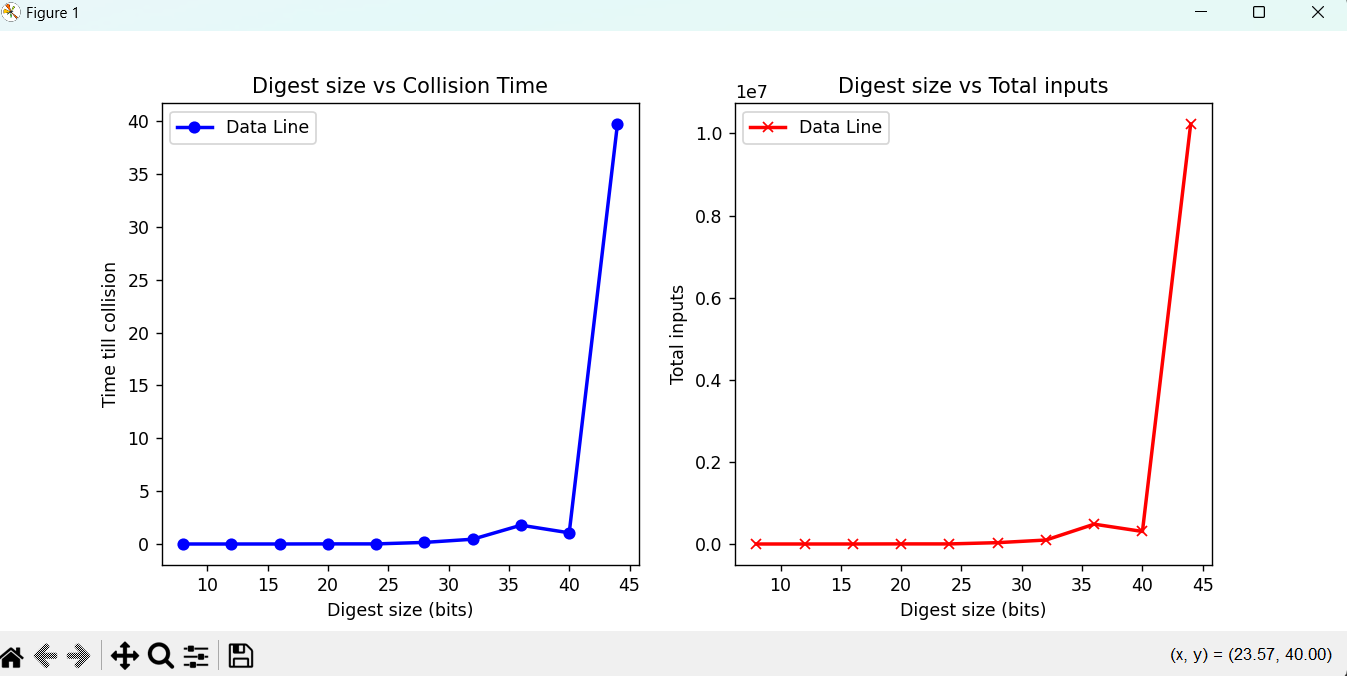

Questions:
1. Despite there only being a 1 bit difference between two very similar input strings their digests are completely different with them differing by all 32 bytes demonstrating how secure the hashing is.
2. The maximum number of files you would ever need to hash to find a collision on an n-bit digest would be 2^n + 1 hashes as you look through every single hash value that is possible before getting to a collision. The birthday bound gives you an expected number of hashes equal to 2^(n/2) when randomly attempting hashes within the range of possible values. ADD OUR DATA HERE
3. For an 8 bit digest there would only be 2^8 or 256 possible hash values meaning we would only have to check 256 different values to find the preimage which should be quite trivial given modern compute powers. Finding a collision would likely be even easier to do as given the birthday bound we would only need to generate around 2^4 or 16 different pseudo-random hash values before we could expect to find a collision which would take substantially less time then the already trivial cracking of the 8 bit digest.
